<center><font size="6">Artificial Intelligence</font><br>
    <h2>A Classificaton Problem :<font size="2"> MNIST Fashion Poject</font></h2></center>
 <pre><sup>                                                                                                                                              MD. RIAD KHAN</sup></pre>

<center><img src="MNIST_F.png" ><img src="MNIST_Lable.png" ></center>

# Important module and library

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Load Data

In [3]:
#https://www.openml.org/d/40996
mnist = fetch_openml("Fashion-MNIST")
#If you want to learn more about the mnist dataset visit: https://www.openml.org/d/554
#print(mnist.data[0])
#print(mnist.data)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [4]:
mnist.data
#mnist.target
#mnist.feature_names
mnist.DESCR
#mnist.details
#mnist.categories
#mnist.url

#type(mnist.data)

"**Author**: Han Xiao, Kashif Rasul, Roland Vollgraf  \n**Source**: [Zalando Research](https://github.com/zalandoresearch/fashion-mnist)  \n**Please cite**: Han Xiao and Kashif Rasul and Roland Vollgraf, Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms, arXiv, cs.LG/1708.07747  \n\nFashion-MNIST is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. \n\nRaw data available at: https://github.com/zalandoresearch/fashion-mnist\n\n### Target classes\nEach training and test example is assigned to one of the following labels:\nLabel  Description  \n0  T-shirt/top  \n1  Trouser  \n2  Pullover  \

In [5]:
mnist_data=pd.DataFrame(mnist.data)
type(mnist_data)

pandas.core.frame.DataFrame

In [6]:
mnist_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,119.0,114.0,130.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,96.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,22.0,...,0.0,0.0,0.0,0.0,133.0,167.0,73.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,82.0,237.0,231.0,70.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

# Visualization data

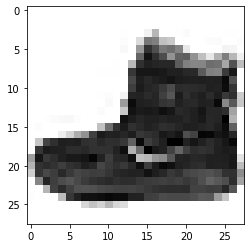

In [9]:
%matplotlib inline
some_img = X[0]   # Selecting the n'th image.like: 5000th image, or here 0 th image
some_image = some_img.reshape(28, 28) # Reshaping it to get the 28x28 pixels
plt.imshow(some_image, cmap = matplotlib.cm.binary, interpolation="nearest")
#plt.axis("off")
plt.show()

In [10]:
some_image  #greyscale RGB codes are from 0 to 255,so here values are from 0 to 255

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,  13.,  73.,   0.,   0.,   1.,   4.,   0.,
          0.,   0.,   0.,   1.,   1.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   3.,   0.,  36., 136., 127.,  62.,  54.,   0.,   0.,   0.,
          1.,   3.,   4.,   0.,   0.,   3.],
       [  0.,   0.,   0.,   0.,   0

In [11]:
some_image.shape

(28, 28)

In [12]:
y[0]

'9'

# Split Dataset for Train and Test

In [13]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


# Train dataset using model/algorithm :  DecisionTreeClassifier

In [14]:
#DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset
#To learn more go to the link: https://scikit-learn.org/stable/modules/tree.html  
from sklearn import tree

clf_dt = tree.DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Lest Predict Our Data

In [15]:
clf_dt.predict([X[9]])

array(['5'], dtype=object)

# Show predict image(data)

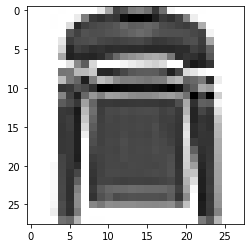

In [25]:
%matplotlib inline
some_img = X[5]   # Selecting the n'th image.like: 5000th image, or here 0 th image
some_image = some_img.reshape(28, 28) # Reshaping it to get the 28x28 pixels
plt.imshow(some_image, cmap = matplotlib.cm.binary, interpolation="nearest")
#plt.axis("off")
plt.show()

# See the actual data what we have 

In [26]:
y[5]

'2'

# Evaluate : Accuracy of DecisionTreeClassifier Model


In [18]:
clf_dt.score(X_test, y_test)

0.792

<h3>Now I use some other algorithms for this problem For just testing....</h3>
<h1> Stochastic Gradient Descent Classifier (SGDClassifier) Algorithm</h1>

In [19]:
#to learn more SGDClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
from sklearn.linear_model import SGDClassifier

clf_sgd = SGDClassifier() 
clf_sgd.fit(X_train, y_train)



SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

# Accuracy of SGDClassigier Model


In [20]:
clf_sgd.score(X_test, y_test)

0.7671

In [23]:
clf_sgd.predict([X[5]])

array(['2'], dtype='<U1')

In [24]:
y[5]

'2'